### Importing Libraries

In [5]:
import pandas as pd
import plotly.express as px
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import mlflow.sklearn
import scipy.stats as st
from mlflow import MlflowClient
warnings.filterwarnings('ignore')

#### Set default values to  layout

In [6]:
layout_options = {
    'paper_bgcolor':"#383838",
    'plot_bgcolor':'#383838',
    'title_font': dict(color='white'),
    'legend_font': dict(color='white'),
    'yaxis':dict(color="white"),
    'xaxis':dict(color="white")
    }

# Bank Customer Churn
As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

### About Dataset

`RowNumber`: corresponds to the record (row) number and has no effect on the output.

`CustomerId`: contains random values and has no effect on customer leaving the bank.

`Surname`: the surname of a customer has no impact on their decision to leave the bank.

`CreditScore`: can have an effect on customer churn, since a customer with a higher credit score
is less likely to leave the bank.

`Geography`: a customer’s location can affect their decision to leave the bank.

`Gender`: it’s interesting to explore whether gender plays a role in a customer leaving the bank.

`Age`: this is certainly relevant, since older customers are less likely to leave their bank than
younger ones.

`Tenure`: refers to the number of years that the customer has been a client of the bank. Normally,
older clients are more loyal and less likely to leave a bank.

`Balance`: also a very good indicator of customer churn, as people with a higher balance in their
accounts are less likely to leave the bank compared to those with lower balances.

`NumOfProducts`: refers to the number of products that a customer has purchased through the
bank.

`HasCrCard`: denotes whether or not a customer has a credit card. This column is also relevant,
since people with a credit card are less likely to leave the bank.

`IsActiveMember`: active customers are less likely to leave the bank.

`EstimatedSalary`: as with balance, people with lower salaries are more likely to leave the bank
compared to those with higher salaries.

`Exited`: whether or not the customer left the bank.

`Complain`: customer has complaint or not.

`Satisfaction Score`: Score provided by the customer for their complaint resolution.

`Card Type`: type of card hold by the customer.

`Points Earned`: the points earned by the customer for using credit card.

In [11]:
customer_churn_df = pd.read_csv("../data/Customer-Churn-Records.csv")

In [12]:
customer_churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# **A**- Data discovery

In [13]:
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [14]:
def build_info_df(df):
    info_df = pd.DataFrame(df.dtypes)
    info_df['total_observations'] = df.index.size
    info_df['missing_val'] = df.isnull().sum()
    info_df['missing_val_ratio'] = (info_df['missing_val'] / df.index.size * 100).round().astype(int)
    info_df = info_df.rename(columns = {0:'data_type'})
    return info_df

In [15]:
build_info_df(customer_churn_df)

,data_type,total_observations,missing_val,missing_val_ratio
RowNumber,int64,10000,0,0
CustomerId,int64,10000,0,0
Surname,object,10000,0,0
CreditScore,int64,10000,0,0
Geography,object,10000,0,0
Gender,object,10000,0,0
Age,int64,10000,0,0
Tenure,int64,10000,0,0
Balance,float64,10000,0,0
NumOfProducts,int64,10000,0,0


### **A.1** - Check duplicate data

In [16]:
print("Number of duplicates: " + str(customer_churn_df.duplicated().sum()))

Number of duplicates: 0


#### **A.2** - Deleting unuseful features

In [17]:
customer_churn_df = customer_churn_df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

### **A.3** - Cheack Outlier in numerical Data

In [18]:
numerical = customer_churn_df.select_dtypes(exclude=['object']).columns.tolist()

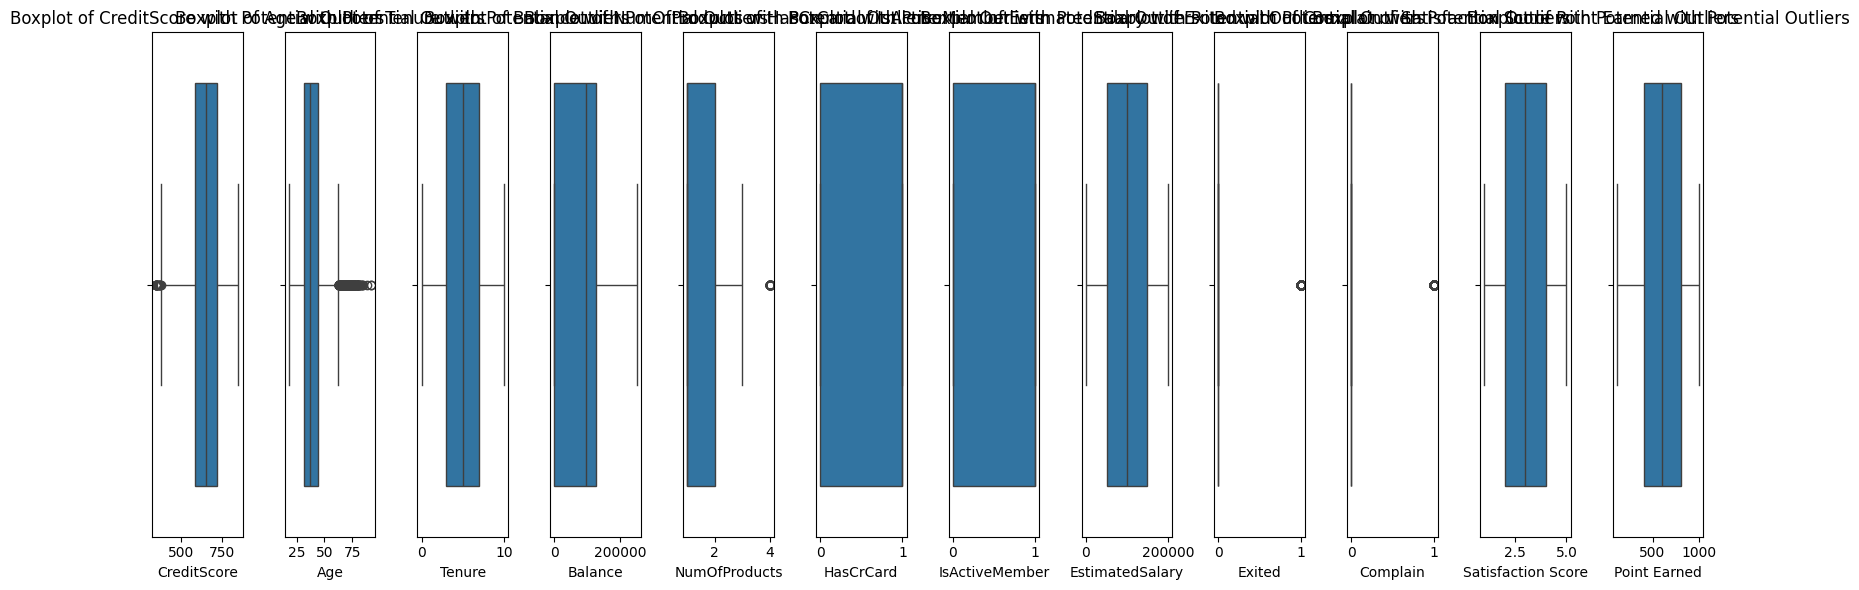

Numerical Variables with Potential Outliers:
CreditScore
Age
NumOfProducts
Exited
Complain


In [19]:
potential_outliers = {}
fig, axes = plt.subplots(nrows=1, ncols=len(numerical), figsize=(16,6))

for i, col in enumerate(numerical):
    Q1 = customer_churn_df[col].quantile(0.25)
    Q3 = customer_churn_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    potential_outliers[col] = customer_churn_df[(customer_churn_df[col] < lower_bound) | (customer_churn_df[col] > upper_bound)]

    sns.boxplot(x=customer_churn_df[col], orient="h", ax=axes[i])
    axes[i].set_title(f"Boxplot of {col} with Potential Outliers")

plt.tight_layout()

plt.show()

print("Numerical Variables with Potential Outliers:")
for col, data in potential_outliers.items():
    if not data.empty:
        print(col)

### **A.4** - Chi-Squared Test for Independence

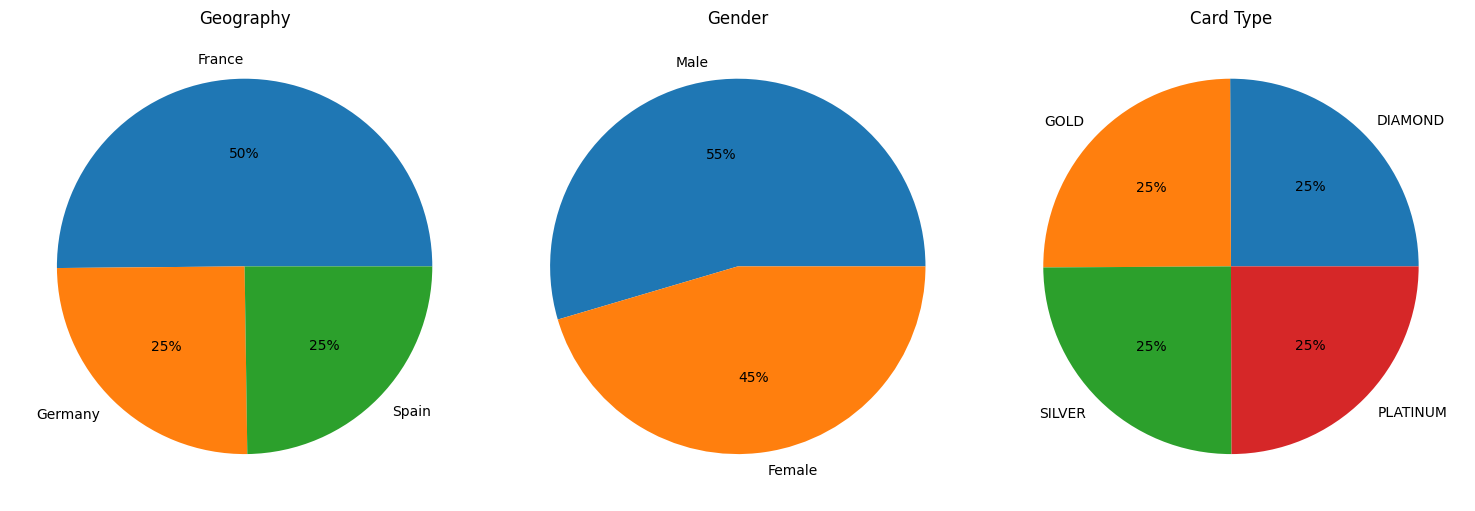

In [20]:
# cat_col = []
# columns = customer_churn_df.columns
# for col in columns:
#     if customer_churn_df[col].dtype == 'object':
#         cat_col.append(col)
# print("Categorical Columns:", cat_col)

# fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# for i in range(len(cat_col)):
#     fracs = list(customer_churn_df[cat_col[i]].value_counts().values)
#     ax[i].pie(x=fracs, labels=customer_churn_df[cat_col[i]].unique(), autopct='%.0f%%')

# plt.tight_layout()
# plt.show()
categorical  = customer_churn_df.select_dtypes('object').columns.tolist()
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(categorical)):
    value_counts = customer_churn_df[categorical[i]].value_counts(normalize=True)
    fracs = value_counts.values
    labels = value_counts.index
    ax[i].pie(x=fracs, labels=labels, autopct='%.0f%%')
    ax[i].set_title(categorical[i])

plt.tight_layout()
plt.show()

### **A.7** - Info of clean dataset

In [22]:
build_info_df(customer_churn_df)

,data_type,total_observations,missing_val,missing_val_ratio
CreditScore,int64,10000,0,0
Geography,object,10000,0,0
Gender,object,10000,0,0
Age,int64,10000,0,0
Tenure,int64,10000,0,0
Balance,float64,10000,0,0
NumOfProducts,int64,10000,0,0
HasCrCard,int64,10000,0,0
IsActiveMember,int64,10000,0,0
EstimatedSalary,float64,10000,0,0


In [23]:
numeric = [
    "CreditScore",   
    "Age",
    "Tenure",
    "Balance",
    "NumOfProducts",
    "EstimatedSalary",
    "Satisfaction Score",
    "Point Earned",
    "HasCrCard",
    "IsActiveMember",
    "Complain",
]
categorical = [
    "Geography",
    "Gender",
    "Card Type",
]
target = "Exited"

### **A.8** - Describe numeric features

In [24]:
# cheack this columns 
    # CreditScore ->  fine 
    # Age -> there is no outlies because based on the data 
    # NumOfProducts
    # Exited
    # Complain

customer_churn_df[numeric].describe().style.format(thousands=',', precision=2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned,HasCrCard,IsActiveMember,Complain
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,650.53,38.92,5.01,"76,485.89",1.53,"100,090.24",3.01,606.52,0.71,0.52,0.20
std,96.65,10.49,2.89,"62,397.41",0.58,"57,510.49",1.41,225.92,0.46,0.50,0.40
min,350.00,18.00,0.00,0.00,1.00,11.58,1.00,119.00,0.00,0.00,0.00
25%,584.00,32.00,3.00,0.00,1.00,"51,002.11",2.00,410.00,0.00,0.00,0.00
50%,652.00,37.00,5.00,"97,198.54",1.00,"100,193.91",3.00,605.00,1.00,1.00,0.00
75%,718.00,44.00,7.00,"127,644.24",2.00,"149,388.25",4.00,801.00,1.00,1.00,0.00
max,850.00,92.00,10.00,"250,898.09",4.00,"199,992.48",5.00,"1,000.00",1.00,1.00,1.00


### **A.9** -  Describe categorical features

In [25]:
customer_churn_df[categorical] = customer_churn_df[categorical].astype("category")
customer_churn_df[categorical].describe()

,Geography,Gender,Card Type
count,10000,10000,10000
unique,3,2,4
top,France,Male,DIAMOND
freq,5014,5457,2507


In [26]:
customer_churn_df[categorical].head()

,Geography,Gender,Card Type
0,France,Female,DIAMOND
1,Spain,Female,DIAMOND
2,France,Female,DIAMOND
3,France,Female,GOLD
4,Spain,Female,GOLD


# **B** - Exploratory Data Analysis

### **B.1** -  Exited Class Distribution ->  Target Class

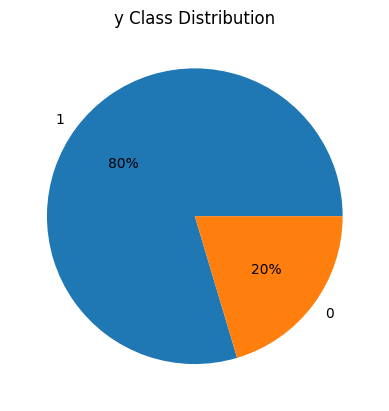

In [27]:
plt.pie(x=customer_churn_df['Exited'].value_counts().values,labels=customer_churn_df['Exited'].unique(),autopct='%.0f%%')
plt.title('y Class Distribution')
plt.show()

### **B.2** -  CreditScore¶

In [28]:
customer_churn_df['CreditScore'].value_counts()

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
358      1
412      1
382      1
373      1
419      1
Name: count, Length: 460, dtype: int64

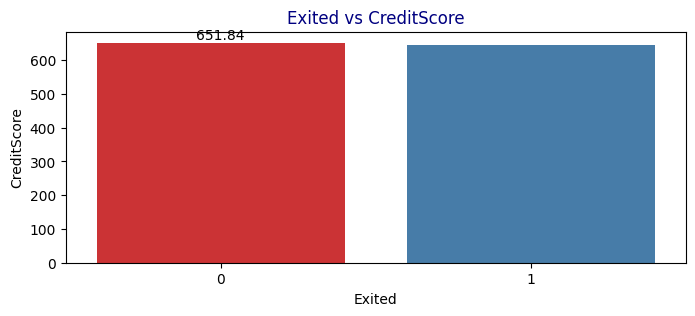

In [29]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(data=customer_churn_df, x = 'Exited', y = 'CreditScore', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'CreditScore',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

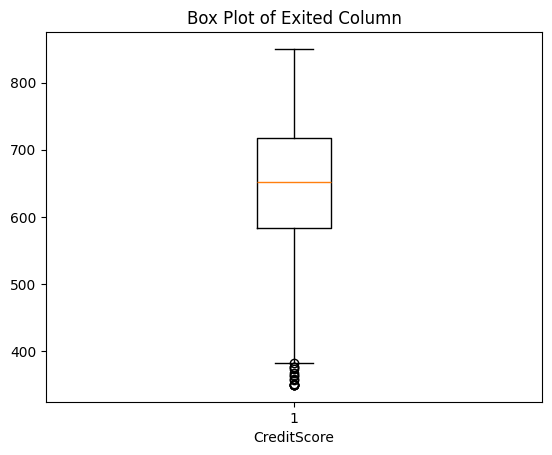

In [30]:
plt.boxplot(customer_churn_df['CreditScore'], vert=True)
plt.title('Box Plot of Exited Column')
plt.xlabel('CreditScore')
plt.show()


### **B.3** - Geography

In [31]:
customer_churn_df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

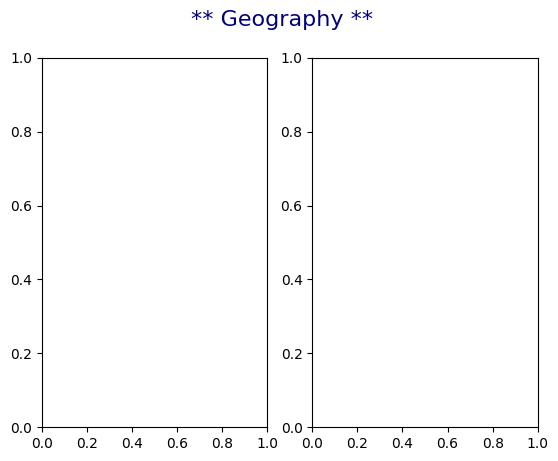

In [32]:
fig, ax = plt.subplots(1, 2) 
fig.suptitle('** ' + 'Geography' + ' **', fontsize=16, color='navy') 
plt.style.use('seaborn')
plt.subplot(1,2,1)
customer_churn_df['Geography'].value_counts().plot(kind='bar',color=sns.color_palette("Set1"))
plt.subplot(1,2,2)
customer_churn_df['Geography'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

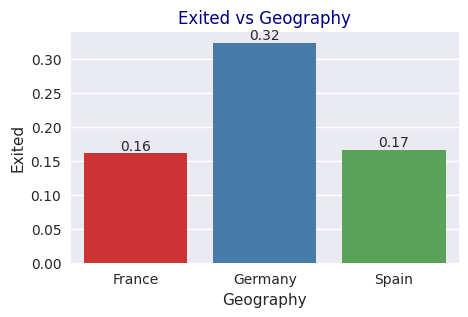

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=customer_churn_df, x = 'Geography', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Geography',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

### **B.4** -  Gender

In [33]:
customer_churn_df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

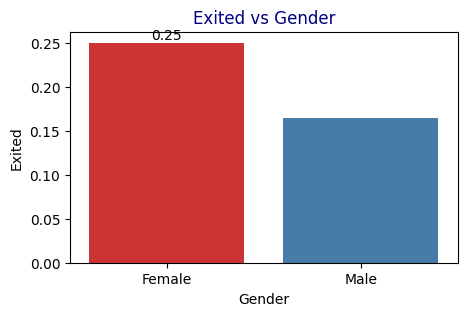

In [36]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=customer_churn_df, x = 'Gender', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Gender',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

### **B.5** - Age


In [37]:
customer_churn_df['Age'].value_counts()

Age
37    478
38    477
35    474
36    456
34    447
     ... 
84      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

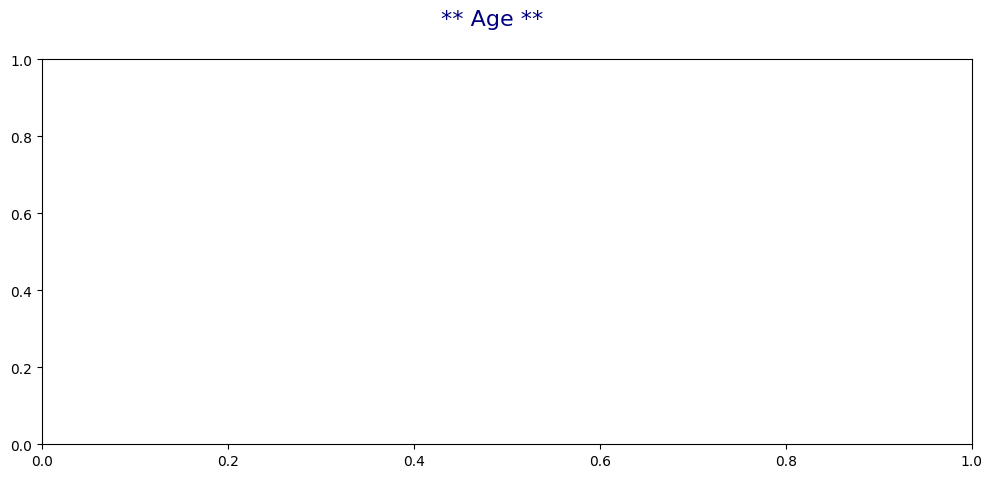

In [38]:
fig, ax = plt.subplots(figsize=(12, 5))
fig.suptitle('** ' + 'Age' + ' **', fontsize=16, color='navy') 
plt.style.use('seaborn')
customer_churn_df['Age'].value_counts().plot(kind='bar',color=sns.color_palette("Set1"))
plt.show()

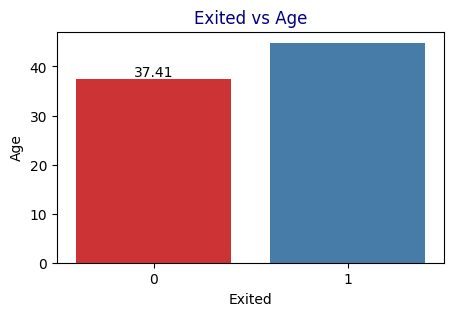

In [39]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=customer_churn_df, x = 'Exited', y = 'Age', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'Age',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

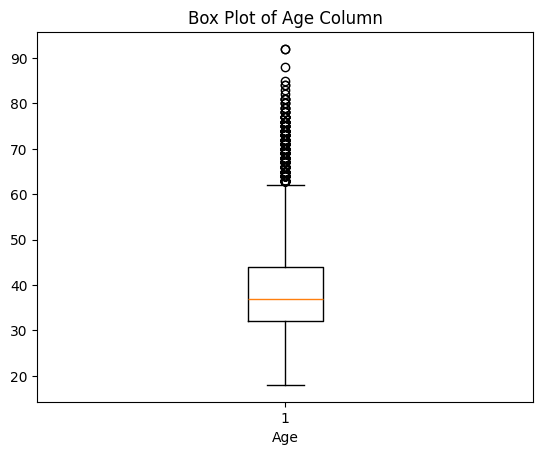

In [40]:
plt.boxplot(customer_churn_df['Age'], vert=True)
plt.title('Box Plot of Age Column')
plt.xlabel('Age')
plt.show()


### **B.6** - NumOfProducts

In [41]:
customer_churn_df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

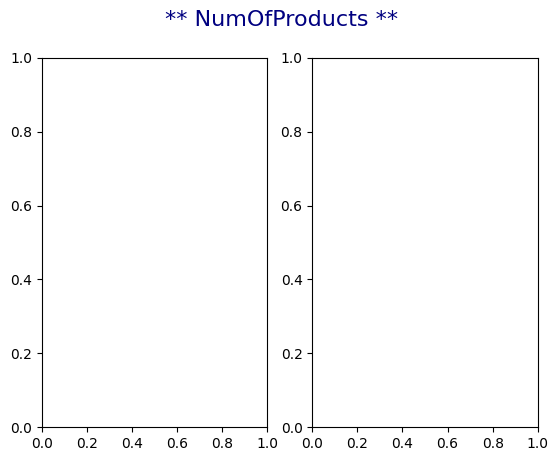

In [42]:
fig, ax = plt.subplots(1, 2) 
fig.suptitle('** ' + 'NumOfProducts' + ' **', fontsize=16, color='navy') 
plt.style.use('seaborn')
plt.subplot(1,2,1)
customer_churn_df['NumOfProducts'].value_counts().plot(kind='bar',color=sns.color_palette("Set1"))
plt.subplot(1,2,2)
customer_churn_df['NumOfProducts'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

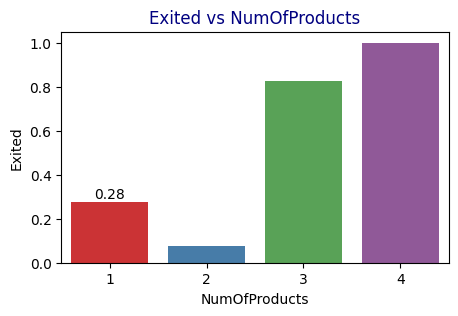

In [43]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=customer_churn_df, x = 'NumOfProducts', y = 'Exited', errorbar=None, palette="Set1")
plt.title('Exited vs '+ 'NumOfProducts',color='navy')
ax.bar_label(ax.containers[0], fmt='%0.2f')
plt.show()

In [46]:
customer_churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [47]:

corr_matrix = customer_churn_df[numeric + [target]].corr()

We can find that there is a high correlation between complain parameter and the target variable, so we have to drop this column

In [ ]:
customer_churn_df = customer_churn_df.drop('Complain',axis=1)

In [51]:
customer_churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


#### maping (HasCrCard, IsActiveMember, Complain) features 

In [52]:
CrCd_map = {
    1: "Yes",
    0: "No"
}
activation_map = {
    1: "Yes",
    0: "No"
}


customer_churn_df["IsActiveMember"] = customer_churn_df["IsActiveMember"].map(activation_map)
customer_churn_df["HasCrCard"] = customer_churn_df["HasCrCard"].map(CrCd_map)


In [53]:
customer_churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,No,No,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0,5,GOLD,425


In [54]:
# X = df[['Gender', 'Balance', 'NumOfProducts', 'Age', 'Geography', 'EstimatedSalary']]
# y = df['Exited']

numeric = [
    "CreditScore",   
    "Age",
    "Tenure",
    "Balance",
    "NumOfProducts",
    "EstimatedSalary",
    "Satisfaction Score",
    "Point Earned",
]
categorical = [
    "Geography",
    "Gender",
    "Card Type",
    "HasCrCard",
    "IsActiveMember",
]
target = "Exited"

In [55]:
customer_churn_df[categorical].head()

,Geography,Gender,Card Type,HasCrCard,IsActiveMember
0,France,Female,DIAMOND,Yes,Yes
1,Spain,Female,DIAMOND,No,Yes
2,France,Female,DIAMOND,Yes,No
3,France,Female,GOLD,No,No
4,Spain,Female,GOLD,Yes,Yes


## B-Feature Engineering

#### 1- Balance salary rate 
The ratio of the account balance to the estimated salary of the customer.

In [56]:
customer_churn_df['balance_salary_rate'] = customer_churn_df.Balance / customer_churn_df.EstimatedSalary
customer_churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned,balance_salary_rate
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1,2,DIAMOND,464,0.000000
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0,3,DIAMOND,456,0.744677
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1,3,DIAMOND,377,1.401375
3,699,France,Female,39,1,0.00,2,No,No,93826.63,0,5,GOLD,350,0.000000
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0,5,GOLD,425,1.587055


In [57]:
customer_churn_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'balance_salary_rate'],
      dtype='object')

In [58]:
def product_utilization_rate_by_year(row):
    number_of_products = row.NumOfProducts
    tenure = row.Tenure
    
    if number_of_products == 0:
        return 0
    
    if tenure == 0:
        return number_of_products
    
    rate = number_of_products / tenure
    return rate

#### 2- Product utilization rate by year
The ratio of the number of products used by the customer to the number of years they have been a customer.

In [59]:
customer_churn_df = customer_churn_df.assign(product_utilization_rate_by_year=customer_churn_df.apply(lambda x: product_utilization_rate_by_year(x), axis=1)) 
customer_churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned,balance_salary_rate,product_utilization_rate_by_year
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1,2,DIAMOND,464,0.000000,0.500
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0,3,DIAMOND,456,0.744677,1.000
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1,3,DIAMOND,377,1.401375,0.375
3,699,France,Female,39,1,0.00,2,No,No,93826.63,0,5,GOLD,350,0.000000,2.000
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0,5,GOLD,425,1.587055,0.500


#### 3- Tenure rate by age
The ratio of the number of years the customer has been a customer to their age minus 17 (to exclude the teenage years).

In [60]:
customer_churn_df['tenure_rate_by_age'] = customer_churn_df.Tenure / (customer_churn_df.Age-17)
customer_churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned,balance_salary_rate,product_utilization_rate_by_year,tenure_rate_by_age
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1,2,DIAMOND,464,0.000000,0.500,0.080000
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0,3,DIAMOND,456,0.744677,1.000,0.041667
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1,3,DIAMOND,377,1.401375,0.375,0.320000
3,699,France,Female,39,1,0.00,2,No,No,93826.63,0,5,GOLD,350,0.000000,2.000,0.045455
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0,5,GOLD,425,1.587055,0.500,0.076923


#### 4- Credit score rate by salary
The ratio of the customer's credit score to their estimated salary.

In [61]:
customer_churn_df['credit_score_rate_by_age'] = customer_churn_df.CreditScore / (customer_churn_df.EstimatedSalary)
customer_churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned,balance_salary_rate,product_utilization_rate_by_year,tenure_rate_by_age,credit_score_rate_by_age
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1,2,DIAMOND,464,0.000000,0.500,0.080000,0.006108
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0,3,DIAMOND,456,0.744677,1.000,0.041667,0.005402
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1,3,DIAMOND,377,1.401375,0.375,0.320000,0.004406
3,699,France,Female,39,1,0.00,2,No,No,93826.63,0,5,GOLD,350,0.000000,2.000,0.045455,0.007450
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0,5,GOLD,425,1.587055,0.500,0.076923,0.010748


#### 5-Countries monthly average salaries 
The estimated monthly average salary for the country of the customer.

In [62]:
def countries_monthly_average_salaries(row):
    #brutto datas from  https://tr.wikipedia.org/wiki/Aylık_ortalama_ücretlerine_göre_Avrupa_ülkeleri_listesi
    fr = 3696    
    de = 4740
    sp = 2257
    salary = row.EstimatedSalary / 12
    country = row.Geography              # Germany, France and Spain
    
    if country == 'Germany':
        return salary / de
    elif country == "France":
        return salary / fr
    elif country == "Spain": 
        return salary / sp

In [63]:
customer_churn_df = customer_churn_df.assign(countries_monthly_average_salaries = customer_churn_df.apply(lambda x: countries_monthly_average_salaries(x), axis=1)) 
customer_churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned,balance_salary_rate,product_utilization_rate_by_year,tenure_rate_by_age,credit_score_rate_by_age,countries_monthly_average_salaries
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1,2,DIAMOND,464,0.000000,0.500,0.080000,0.006108,2.285103
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0,3,DIAMOND,456,0.744677,1.000,0.041667,0.005402,4.155316
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1,3,DIAMOND,377,1.401375,0.375,0.320000,0.004406,2.568803
3,699,France,Female,39,1,0.00,2,No,No,93826.63,0,5,GOLD,350,0.000000,2.000,0.045455,0.007450,2.115499
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0,5,GOLD,425,1.587055,0.500,0.076923,0.010748,2.919956


### one hot encoding 

In [64]:
customer_churn_df = pd.get_dummies(customer_churn_df,dtype=int)

### C- Data Preproccessing

الأعلى من 1 تعني أن العميل يكسب أكثر من المتوسط، في حين أن النسبة الأقل من 1 تعني أنه يكسب أقل.

In [65]:
customer_churn_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Satisfaction Score,Point Earned,balance_salary_rate,...,Gender_Female,Gender_Male,HasCrCard_No,HasCrCard_Yes,IsActiveMember_No,IsActiveMember_Yes,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,101348.88,1,2,464,0.000000,...,1,0,0,1,0,1,1,0,0,0
1,608,41,1,83807.86,1,112542.58,0,3,456,0.744677,...,1,0,1,0,0,1,1,0,0,0
2,502,42,8,159660.80,3,113931.57,1,3,377,1.401375,...,1,0,0,1,1,0,1,0,0,0
3,699,39,1,0.00,2,93826.63,0,5,350,0.000000,...,1,0,1,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,79084.10,0,5,425,1.587055,...,1,0,0,1,0,1,0,1,0,0


In [66]:
numeric = [
    "CreditScore",   
    "Age",
    "Tenure",
    "Balance",
    "NumOfProducts",
    "EstimatedSalary",
    "Satisfaction Score",
    "Point Earned",
    "balance_salary_rate",
    "credit_score_rate_by_age",
    "tenure_rate_by_age",
    "product_utilization_rate_by_year",
    "countries_monthly_average_salaries"
]

In [67]:
customer_churn_df[numeric].describe().style.format(thousands=',', precision=2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned,balance_salary_rate,credit_score_rate_by_age,tenure_rate_by_age,product_utilization_rate_by_year,countries_monthly_average_salaries
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,650.53,38.92,5.01,"76,485.89",1.53,"100,090.24",3.01,606.52,3.88,0.03,0.31,0.51,2.48
std,96.65,10.49,2.89,"62,397.41",0.58,"57,510.49",1.41,225.92,108.34,0.64,0.40,0.51,1.64
min,350.00,18.00,0.00,0.00,1.00,11.58,1.00,119.00,0.00,0.00,0.00,0.10,0.00
25%,584.00,32.00,3.00,0.00,1.00,"51,002.11",2.00,410.00,0.00,0.00,0.11,0.20,1.17
50%,652.00,37.00,5.00,"97,198.54",1.00,"100,193.91",3.00,605.00,0.75,0.01,0.23,0.33,2.31
75%,718.00,44.00,7.00,"127,644.24",2.00,"149,388.25",4.00,801.00,1.51,0.01,0.39,0.67,3.47
max,850.00,92.00,10.00,"250,898.09",4.00,"199,992.48",5.00,"1,000.00","10,614.66",61.23,10.00,4.00,7.38


In [68]:
customer_churn_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Satisfaction Score,Point Earned,balance_salary_rate,...,Gender_Female,Gender_Male,HasCrCard_No,HasCrCard_Yes,IsActiveMember_No,IsActiveMember_Yes,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,101348.88,1,2,464,0.000000,...,1,0,0,1,0,1,1,0,0,0
1,608,41,1,83807.86,1,112542.58,0,3,456,0.744677,...,1,0,1,0,0,1,1,0,0,0
2,502,42,8,159660.80,3,113931.57,1,3,377,1.401375,...,1,0,0,1,1,0,1,0,0,0
3,699,39,1,0.00,2,93826.63,0,5,350,0.000000,...,1,0,1,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,79084.10,0,5,425,1.587055,...,1,0,0,1,0,1,0,1,0,0


### Base Line

In [82]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
mlflow.set_experiment("MLflow Customer-Churn")

<Experiment: artifact_location='mlflow-artifacts:/646791148661992805', creation_time=1736172457734, experiment_id='646791148661992805', last_update_time=1736172457734, lifecycle_stage='active', name='MLflow Customer-Churn', tags={'mlflow.sharedViewState.60b5838b3c07b10d688fd52b4dd6c37593b139dcfb12d21877e12fcb552682f6': 'deflate;eJxdUl1PwzAM/CsozxOC176VMT7EhlA3JqQJbVnirZbSpIqdsYL233HXQQePPt/5nHO+FIGOprxDxxBVptRAhWgh3jRP0EitmSOuEwNdEuvIS8YKelJORmUb7QgG6tifte1M5eOxkBxuwDTGwe/43DDuWr3VrAmYfjqL94GqggU3h0gYfK9w7qJInkRD4MAw2GFwqRIkW5yvt5qGFA2shHiOTtqh9B+97exXSmyjTB/ta+0tWJV9HTrkBb1v68WJ8YDWgu/rORKu0SE3E133so7Wmsrud4/FdLa8vloWr89T2WCH8DHRe6zwsx19yk1kYyT+MTihSLkxkrJkUcAx7TNJIriPIdVg59oloEc/LCV8iYRjkn6JFkZVzc1feNtqbuSsPjl3Kv89XScOBWwiUDnyeu3OTLcurLUbo4fj1GHwG9yKSu3zPVL3XYihPh7ew7QKgUsPJPZX/fHeWvIE5BSmk6jD4RvYX+ai'}>

In [128]:
def train_and_eval(model, X_train, Y_train, X_test, Y_test, model_name=None):
    with mlflow.start_run(run_name=model_name,nested=True) as run:
        if hasattr(model, 'get_params'):
            params = model.get_params()
            mlflow.log_params(params)
        fit_data = model.fit(X_train, Y_train)
        if model_name:
            mlflow.set_tag("model_name", model_name)
        predict_test = model.predict(X_test)
        accuracy = accuracy_score(Y_test, predict_test)
        f1 = f1_score(Y_test, predict_test)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("f1_score", f1)
        print("Accuracy is ", accuracy)
        print('F1 score is', f1)
        if model_name in ["LogisticRegression", "SVC"]:
            y_score_model = model.decision_function(X_test)
            fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_score_model)
            roc_auc_lr = auc(fpr_lr, tpr_lr)
            mlflow.log_metric("roc_auc", roc_auc_lr)

            print('Area under ROC is', roc_auc_lr)
            plt.figure()
            plt.xlim([-0.01, 1.00])
            plt.ylim([-0.01, 1.01])
            plt.plot(fpr_lr, tpr_lr, lw=3, label=f'{model_name} ROC curve (area = {roc_auc_lr:.2f})')
            plt.xlabel('False Positive Rate', fontsize=16)
            plt.ylabel('True Positive Rate', fontsize=16)
            plt.title('ROC curve ', fontsize=16)
            plt.legend(loc='lower right', fontsize=13)
            plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
            plt.savefig("roc_curve.png")
            plt.close()
            mlflow.log_artifact("roc_curve.png")
        mlflow.sklearn.log_model(model, "model")

In [85]:
X_train, X_test, y_train, y_test = train_test_split(customer_churn_df[numeric], customer_churn_df[target], random_state=42, stratify=customer_churn_df[target])

In [86]:
pipeline_lr=Pipeline([("lr_scalar",StandardScaler()),
                     ("lr",LogisticRegression())])

pipeline_dt=Pipeline([("dt_scalar",StandardScaler()),
                     ("dt",DecisionTreeClassifier())])

pipeline_rf=Pipeline([("rf_sacalat",StandardScaler()),
                     ("rf",RandomForestClassifier())])


pipeline_kn=Pipeline([("knn_sclalar",StandardScaler()),
                     ("kn",KNeighborsClassifier())])

pipeline_svm=Pipeline([('svc_scalar',StandardScaler()),
                       ('svm',SVC(probability=True))])

pipeline_gnb=Pipeline([('gnb_scalar',StandardScaler()),
                       ('GaussianNB', GaussianNB())])

pipeline_GBM=Pipeline([('gbm_scalar',StandardScaler()),
                       ('GradientBoostingClassifier', GradientBoostingClassifier())])


pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn,pipeline_svm, pipeline_gnb,pipeline_GBM]


In [87]:
pipeline_dict = {0: "LogisticRegression", 1: "DecisionTree", 2:
                  "RandomForest",3: "KNeighbors", 
                  4 : 'SVC', 5: 'GaussianNB',6:'GradientBoostingClassifier'}

In [88]:
for i, model in enumerate(pipelines):
    print("Model Name : ",pipeline_dict[i])
    train_and_eval(model, X_train.values, y_train, X_test, y_test, model_name=pipeline_dict[i])
    print()
mlflow.end_run()

Model Name :  LogisticRegression
Accuracy is  0.786
F1 score is 0.08547008547008547
Area under ROC is 0.7367169946488077


2025/01/06 17:13:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/c89db38f4d974960972cbab6ff84409b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805

Model Name :  DecisionTree
Accuracy is  0.76
F1 score is 0.441340782122905


2025/01/06 17:13:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run DecisionTree at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/9cb5bcb2adb1426fae2cf5db37a35c0e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805

Model Name :  RandomForest
Accuracy is  0.84
F1 score is 0.4936708860759494


2025/01/06 17:13:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/182776a52ff14d3798fa112151f0aaab
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805

Model Name :  KNeighbors
Accuracy is  0.8248
F1 score is 0.44836272040302266


2025/01/06 17:13:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run KNeighbors at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/c1845af5896e42df8881dc5e29094308
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805

Model Name :  SVC
Accuracy is  0.8272
F1 score is 0.30990415335463256
Area under ROC is 0.8107258695564225


2025/01/06 17:14:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVC at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/e7a61b41ef2e4e6488efa9c375238cfd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805

Model Name :  GaussianNB
Accuracy is  0.7936
F1 score is 0.06521739130434782


2025/01/06 17:14:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GaussianNB at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/e63315306f0a499d91c1f113bcd8d11e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805

Model Name :  GradientBoostingClassifier
Accuracy is  0.8488
F1 score is 0.548926014319809


2025/01/06 17:14:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/579e1822e70448ffbb0b1e26dba7397f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805



Based on the previous results we can notice that the recall metric is too low for every model so we have to find a way to fix this problem.
we can try grid search to find the best hyper paramters that increase the value of recall and f1-score.

In [117]:
pipeline_dict_Param = {0: "LogisticRegression_Param", 1: "DecisionTree_Param",2: "KNeighbors_Param", 
                  3 : 'SVC_Param', 4: 'GaussianNB_Param',5:'RandomForest_Param'}

lr_params = [
    {
        "lr__C": [0.1,0.8,1],
        "lr__penalty": ['l1','l2'],
    },
]
dt_params =  {
    'dt__max_depth': [3, 4, 5],
    'dt__min_samples_split': [2, 3],
    'dt__criterion': ['entropy', 'gini']
}

k_range = list(range(1, 5))
weight_options = ['uniform', 'distance']
p=[1,2]
algorithm = ["ball_tree","brute"]
knn_params = [
    {
        "kn__n_neighbors":k_range,
        "kn__weights":weight_options,
        "kn__p":p,
        "kn__algorithm":algorithm
    },
]
nb_params = {
    'GaussianNB__var_smoothing': np.logspace(0,-9, num=20)
}
svm_params = {'svm__C': [0.1], 
              'svm__gamma': [1, 0.1],
              'svm__kernel': [ "rbf",]} 

n_estimators = [1, 4]
max_depth = list(range(1, 3))
min_samples_split = [2, 5]
rf_params = [
    {
        "rf__n_estimators":n_estimators,
        "rf__max_depth":max_depth,
        "rf__min_samples_split":min_samples_split,
    },
]
pipelines_of_param = [lr_params, dt_params, knn_params,svm_params, nb_params, rf_params]
pipelines_of_names = [pipeline_lr, pipeline_dt, pipeline_kn,pipeline_svm, pipeline_gnb,pipeline_rf]

In [118]:
def grid_search_evaluation(model, params, X_train, y_train, X_test, y_test, cv=5, model_name="Unknown"):
    with mlflow.start_run(run_name=f"GridSearch_{model_name}"):
        grid_search = GridSearchCV(model, params, scoring='f1', cv=cv, verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_params = grid_search.best_params_
        best_estimator = grid_search.best_estimator_
        mlflow.log_params(best_params)
        predictions = best_estimator.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("f1_score", f1)
        print(f"Best Parameters for {model_name}: {best_params}")
        print(f"Accuracy for {model_name}: {accuracy}")
        print(f"F1 Score for {model_name}: {f1}")
        mlflow.sklearn.log_model(best_estimator, f"best_model_{model_name}")


In [119]:
for i in range(len(pipelines_of_names)):
    grid_search_evaluation(pipelines_of_names[i],pipelines_of_param[i],X_train,y_train,X_test,y_test,cv = 10,model_name=pipeline_dict_Param[i])


Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Parameters for LogisticRegression_Param: {'lr__C': 0.8, 'lr__penalty': 'l2'}
Accuracy for LogisticRegression_Param: 0.786
F1 Score for LogisticRegression_Param: 0.08547008547008547


2025/01/06 18:36:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GridSearch_LogisticRegression_Param at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/0657207bcb4147a4a563e7a5dc01d4e3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best Parameters for DecisionTree_Param: {'dt__criterion': 'entropy', 'dt__max_depth': 4, 'dt__min_samples_split': 2}
Accuracy for DecisionTree_Param: 0.8384
F1 Score for DecisionTree_Param: 0.5835051546391753


2025/01/06 18:36:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GridSearch_DecisionTree_Param at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/61cc6ebf53494b8f8656f2540100cfe8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805
Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best Parameters for KNeighbors_Param: {'kn__algorithm': 'ball_tree', 'kn__n_neighbors': 3, 'kn__p': 1, 'kn__weights': 'uniform'}
Accuracy for KNeighbors_Param: 0.8036
F1 Score for KNeighbors_Param: 0.43498273878020716


2025/01/06 18:36:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GridSearch_KNeighbors_Param at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/ef5023d44c764a2d9383f4f671763ce8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Parameters for SVC_Param: {'svm__C': 0.1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Accuracy for SVC_Param: 0.8168
F1 Score for SVC_Param: 0.1879432624113475


2025/01/06 18:37:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GridSearch_SVC_Param at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/cf0e0a65a2044806a21e6866f88fc38e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best Parameters for GaussianNB_Param: {'GaussianNB__var_smoothing': np.float64(0.0379269019073225)}
Accuracy for GaussianNB_Param: 0.7952
F1 Score for GaussianNB_Param: 0.055350553505535055


2025/01/06 18:37:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GridSearch_GaussianNB_Param at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/b273caa137bd4963b7a3e3e530a31c79
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Parameters for RandomForest_Param: {'rf__max_depth': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 4}
Accuracy for RandomForest_Param: 0.7972
F1 Score for RandomForest_Param: 0.007827788649706457


2025/01/06 18:38:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GridSearch_RandomForest_Param at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/3789785f8712498b9a11f7aeac898975
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805


The previous results weren't as good as we want and that because of the data is un-balanced and we have to make it balanced.
there are two main methods to balance the data which are:
1. oversampling
2. undersampling

lets try both of them

### Undersampling

In [129]:
from imblearn.under_sampling import RandomUnderSampler

def apply_undersampling_and_log(X_train, y_train, X_test, y_test, pipelines, pipeline_dict):
    # Start the main run
    with mlflow.start_run(run_name="RandomUnderSampling"):
        # Log undersampling strategy
        sampling_strategy = 1  # Numerical value
        rus = RandomUnderSampler(sampling_strategy=sampling_strategy)

        # Apply undersampling
        X_train_res, y_train_res = rus.fit_resample(X_train, y_train)
        X_test_res, y_test_res = rus.fit_resample(X_test, y_test)

        # Log resampling details
        mlflow.log_param("undersampling_strategy", sampling_strategy)
        mlflow.log_metric("X_train_resampled_size", X_train_res.shape[0])
        mlflow.log_metric("y_train_resampled_size", y_train_res.shape[0])
        mlflow.log_metric("X_test_resampled_size", X_test_res.shape[0])
        mlflow.log_metric("y_test_resampled_size", y_test_res.shape[0])

        print(f"Resampled X_train size: {X_train_res.shape}")
        print(f"Resampled y_train size: {y_train_res.shape}")
        print(f"Resampled X_test size: {X_test_res.shape}")
        print(f"Resampled y_test size: {y_test_res.shape}")

        # Train and evaluate each model
        for i, model in enumerate(pipelines):
            model_name = pipeline_dict[i]
            print("Model Name:", model_name)
            train_and_eval(
                    model, 
                    X_train_res.values, 
                    y_train_res, 
                    X_test_res.values, 
                    y_test_res, 
                    model_name=model_name
                )
# Call the function
apply_undersampling_and_log(X_train, y_train, X_test, y_test, pipelines, pipeline_dict)


Resampled X_train size: (3058, 13)
Resampled y_train size: (3058,)
Resampled X_test size: (1018, 13)
Resampled y_test size: (1018,)
Model Name: LogisticRegression
Accuracy is  0.7053045186640472
F1 score is 0.7023809523809523
Area under ROC is 0.7479514128785978


2025/01/06 18:50:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/5e2ac52c0eee4398adfd80675c2d53f3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805
Model Name: DecisionTree
Accuracy is  0.6581532416502947
F1 score is 0.6627906976744186


2025/01/06 18:50:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run DecisionTree at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/51f5d5ceb26f43f29da2407c89cf7713
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805
Model Name: RandomForest
Accuracy is  0.7593320235756386
F1 score is 0.757185332011893


2025/01/06 18:50:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/2da2540d43e74d0bac830ffdc90951c6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805
Model Name: KNeighbors
Accuracy is  0.7023575638506876
F1 score is 0.7049659201557936


2025/01/06 18:50:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run KNeighbors at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/749ceb56ba264ad68c469c9c0f7c42cc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805
Model Name: SVC
Accuracy is  0.7554027504911591
F1 score is 0.7527308838133069
Area under ROC is 0.8321760376098594


2025/01/06 18:50:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVC at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/1798f6698bbf45d8b4033d6b1bf52c4f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805
Model Name: GaussianNB
Accuracy is  0.5176817288801572
F1 score is 0.08224299065420561


2025/01/06 18:50:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GaussianNB at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/cb3ed4d251de4e87a7dc414289809f42
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805
Model Name: GradientBoostingClassifier
Accuracy is  0.7573673870333988
F1 score is 0.7517587939698492


2025/01/06 18:50:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/c702de0a829e4e189a982f367592804f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805
🏃 View run RandomUnderSampling at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/2b44c87bc92b4fffa41a1cfb5075476b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805


### Oversampling

In [130]:
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN

def apply_oversampling_and_log(X_train, y_train, X_test, y_test, pipelines, pipeline_dict):
    with mlflow.start_run(run_name="RandomOverSampling"):
        # Log undersampling strategy
        random_state_param  = 0 
        smote = SMOTE(random_state=random_state_param)

        # Apply undersampling
        X_train_over_sampled, y_train_over_sampled = smote.fit_resample(X_train, y_train)
        X_test_over_sampled, y_test_over_sampled = smote.fit_resample(X_test, y_test)

        # Log resampling details
        mlflow.log_param("random_state", random_state_param)
        mlflow.log_metric("X_train_oversmaple_size", X_train_over_sampled.shape[0])
        mlflow.log_metric("y_train_oversmaple_size", y_train_over_sampled.shape[0])
        mlflow.log_metric("X_test_oversmaple_size", X_test_over_sampled.shape[0])
        mlflow.log_metric("y_test_oversmaple_size", y_test_over_sampled.shape[0])

        print(f"Over Sample X_train size: {X_train_over_sampled.shape}")
        print(f"Over Sample y_train size: {y_train_over_sampled.shape}")
        print(f"Over Sample X_test size: {X_test_over_sampled.shape}")
        print(f"Over Sample y_test size: {y_test_over_sampled.shape}")

        # Train and evaluate each model
        for i, model in enumerate(pipelines):
            model_name = pipeline_dict[i]
            print("Model Name:", model_name)
            
            train_and_eval(
                    model, 
                    X_train_over_sampled.values, 
                    y_train_over_sampled, 
                    X_test_over_sampled.values, 
                    y_test_over_sampled, 
                    model_name=model_name
                )
            print()

# Call the function
apply_oversampling_and_log(X_train, y_train, X_test, y_test, pipelines, pipeline_dict)


Over Sample X_train size: (11942, 13)
Over Sample y_train size: (11942,)
Over Sample X_test size: (3982, 13)
Over Sample y_test size: (3982,)
Model Name: LogisticRegression
Accuracy is  0.7091913611250628
F1 score is 0.7088989441930619
Area under ROC is 0.7744523888386741


2025/01/06 18:53:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/c8d3848fa51d483f9fc95dbc30130d04
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805

Model Name: DecisionTree
Accuracy is  0.7973380210949271
F1 score is 0.7936589107645103


2025/01/06 18:53:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run DecisionTree at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/dc154a4e86c247c3a3ac28ca6068b7f9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805

Model Name: RandomForest
Accuracy is  0.82245102963335
F1 score is 0.8113157192420604


2025/01/06 18:53:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/377f42bea6e24ffbb3ea97abea50a061
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805

Model Name: KNeighbors
Accuracy is  0.7538925163234556
F1 score is 0.7575457694210787


2025/01/06 18:53:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run KNeighbors at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/a1027c1862d14983ba3cc64aceaa6b9f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805

Model Name: SVC
Accuracy is  0.8211953792064289
F1 score is 0.8178096212896623
Area under ROC is 0.8983943567247994


2025/01/06 18:54:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVC at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/c8e6f13c353b4ba2bc0a30be730941a9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805

Model Name: GaussianNB
Accuracy is  0.5007533902561527
F1 score is 0.031189083820662766


2025/01/06 18:54:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GaussianNB at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/112e119842c5464da617ec15e607478a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805

Model Name: GradientBoostingClassifier
Accuracy is  0.8631341034655952
F1 score is 0.8617803702764393


2025/01/06 18:54:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoostingClassifier at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/b70719a729df4d649b438573043ef215
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805

🏃 View run RandomOverSampling at: http://127.0.0.1:5000/#/experiments/646791148661992805/runs/608d11cb1f0949b88f0e2efe90a4413c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/646791148661992805
